In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
df_train = pd.read_csv('train.csv', na_values=['', ' ', 'na', 'nan'])
df_test = pd.read_csv('test.csv', na_values=['', ' ', 'na', 'nan'])

In [4]:
df_train.isna().sum()
# 891개 Data
# 결측치 Age: 177개, Cabin: 687개, Embarked: 2개


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test.isna().sum()
# 418개 Data
# 결측치 Age: 86개, Fare: 1개 Cabin: 327개

# len(df_test)
# df_train.groupby('Sex').desribe()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

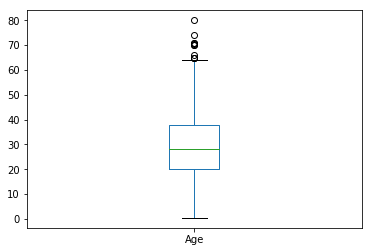

In [4]:
df_train['Age'].plot(kind='box')

In [9]:
df_train["Age_check"] = df_train["Age"].isna()
df_train.groupby("Age_check").describe()

PassengerId                                                      \
                count        mean         std  min     25%    50%     75%   
Age_check                                                                   
False           714.0  448.582633  259.119524  1.0  222.25  445.0  677.75   
True            177.0  435.581921  250.552901  6.0  230.00  452.0  634.00   

                 Survived            ... Parch        Fare             \
             max    count      mean  ...   75%  max  count       mean   
Age_check                            ...                                
False      891.0    714.0  0.406162  ...   1.0  6.0  714.0  34.694514   
True       889.0    177.0  0.293785  ...   0.0  2.0  177.0  22.158567   

                                                            
                 std  min   25%      50%     75%       max  
Age_check                                                   
False      52.918930  0.0  8.05  15.7417  33.375  512.3292  
True       31.874608  0.0  7.75   8.0500  24.150  227.5250  

[2 rows x 56 columns]

In [7]:
# list(df_train['Ticket'])
list_type_train = list(map(lambda x: x[-1], list(df_train['Ticket'])))
list_type_test = list(map(lambda x: x[-1], list(df_test['Ticket'])))

In [8]:
print(set(list_type_train))
print(set(list_type_test))

{'9', '4', '2', '7', '1', 'E', '0', '3', '8', '5', '6'}
{'9', '2', '7', '1', '6', '0', '3', '8', '5', '4'}


In [7]:
df_train.dtypes

df_train["Embarked"].dtypes

dtype('O')

In [20]:
oe = preprocessing.OneHotEncoder()
le = preprocessing.LabelEncoder()
df_train2 = df_train.copy()

df_train['Embarked'] = df_train['Embarked'].astype(str)
test = le.fit_transform(df_train['Embarked'])
test2 = oe.fit_transform(df_train[['Embarked']])

count_summary = {}
for i in set(test):
    count_summary[i] = list(test).count(i)

print(test2.toarray())



[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
